### Team members: Sudarshan Guttula, Stanley Do

### Imports and Setting up the data frame + first look at data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) 
# This displays all columns

%matplotlib inline 

In [2]:
kobe = pd.read_csv('data.csv')
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,0,1996-97,42,18,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/3/1996,LAL vs. MIN,MIN,22902
1,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,2,0,1996-97,8,16,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/5/1996,LAL @ NYK,NYK,22903
2,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,2,0,1996-97,37,23,1.0,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/6/1996,LAL @ CHH,CHA,22904
3,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,2,0,1996-97,34,0,0.0,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/6/1996,LAL @ CHH,CHA,22905
4,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,2,0,1996-97,27,13,1.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,11/6/1996,LAL @ CHH,CHA,22906


In [3]:
kobe.set_index('shot_id', inplace=True)
kobe.drop(['team_id', 'team_name', 'matchup'], axis=1, inplace=True)
kobe['game_date'] = pd.to_datetime(kobe['game_date'])

### First and Last game of Kobe Bryant

In [4]:
kobe['game_date'].describe()

<ipython-input-4-012d90693907>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  kobe['game_date'].describe()


count                   30697
unique                   1559
top       2016-04-13 00:00:00
freq                       50
first     1996-11-03 00:00:00
last      2016-04-13 00:00:00
Name: game_date, dtype: object

#### Number of shots made in each "action_type"

In [5]:
action_type_shots_made = kobe.groupby('action_type').count()['shot_made_flag']
action_type_shots_made

action_type
Alley Oop Dunk Shot                      95
Alley Oop Layup shot                     67
Cutting Finger Roll Layup Shot            0
Cutting Layup Shot                        6
Driving Bank shot                         3
Driving Dunk Shot                       257
Driving Finger Roll Layup Shot           59
Driving Finger Roll Shot                 68
Driving Floating Bank Jump Shot           1
Driving Floating Jump Shot                3
Driving Hook Shot                        13
Driving Jump shot                        23
Driving Layup Shot                     1628
Driving Reverse Layup Shot               83
Driving Slam Dunk Shot                   43
Dunk Shot                               217
Fadeaway Bank shot                       27
Fadeaway Jump Shot                      872
Finger Roll Layup Shot                   28
Finger Roll Shot                         26
Floating Jump shot                       93
Follow Up Dunk Shot                      10
Hook Bank Shot      

# Analysis and Visuals

### Matchups vs other teams

#### Regular season and Playoffs

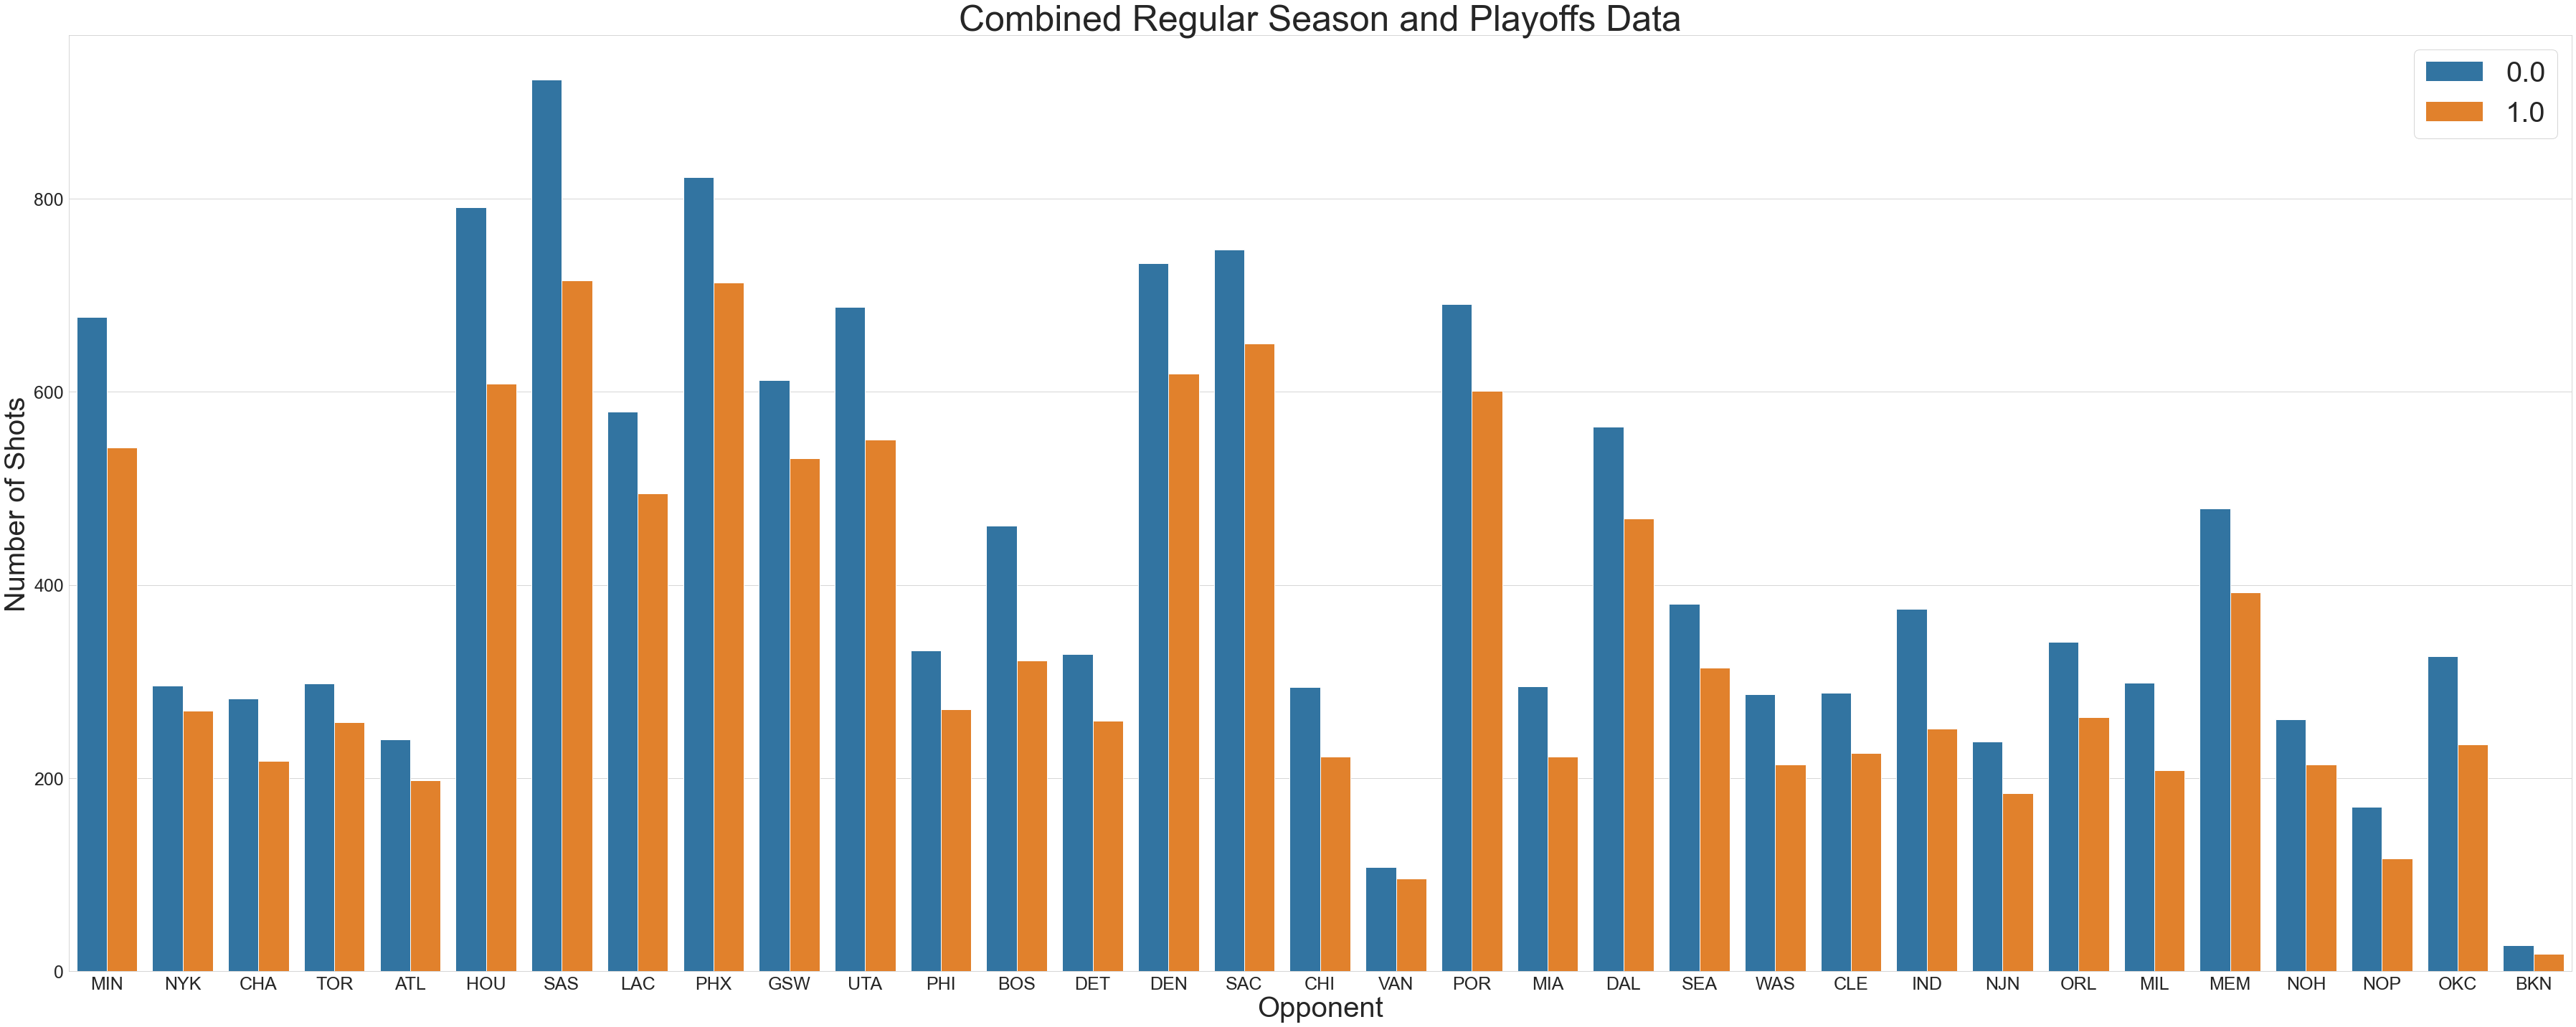

In [6]:
plt.figure(figsize=(50,20))
sns.countplot(x='opponent', hue='shot_made_flag', data=kobe)
plt.xlabel('Opponent', fontsize=40)
plt.ylabel('Number of Shots', fontsize=40)
plt.legend(loc=1,prop={'size':40})
plt.tick_params(labelsize=25)
plt.title('Combined Regular Season and Playoffs Data', fontsize=50)
plt.tight_layout()
plt.show()

#### Playoffs only

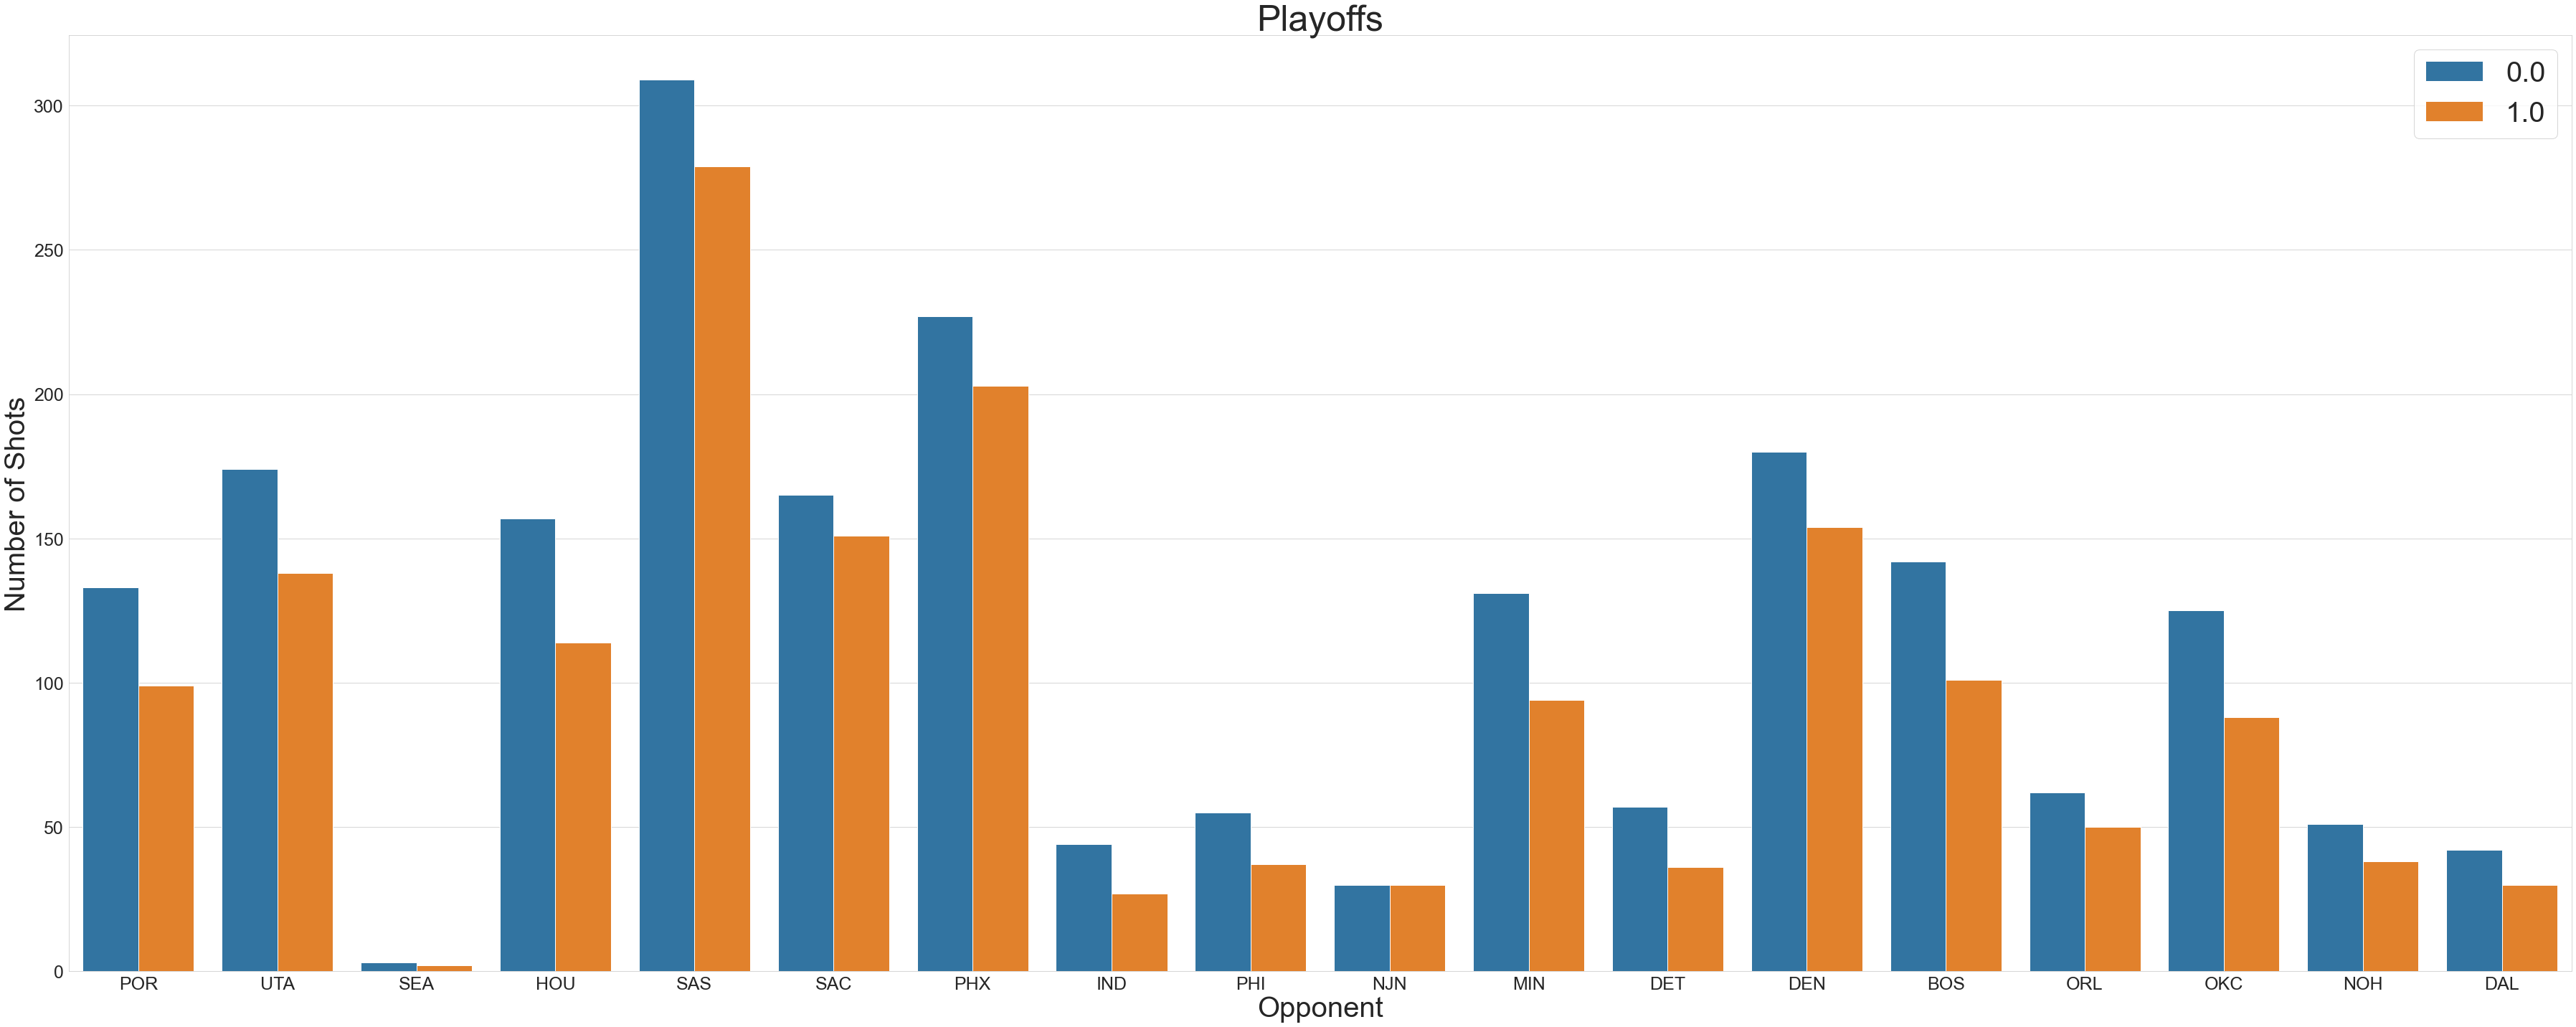

In [7]:
plt.figure(figsize=(50,20))
sns.countplot(x='opponent', hue='shot_made_flag', data=kobe[kobe['playoffs']==1])
plt.xlabel('Opponent', fontsize=40)
plt.ylabel('Number of Shots', fontsize=40)
plt.legend(loc=1,prop={'size':40})
plt.tick_params(labelsize=25)
plt.title('Playoffs', fontsize=50)
plt.tight_layout()
plt.show()

### Year

In [8]:
kobe['year'] = kobe['game_date'].dt.year

#### Kobe's made shots each season during his career

<AxesSubplot:xlabel='year', ylabel='count'>

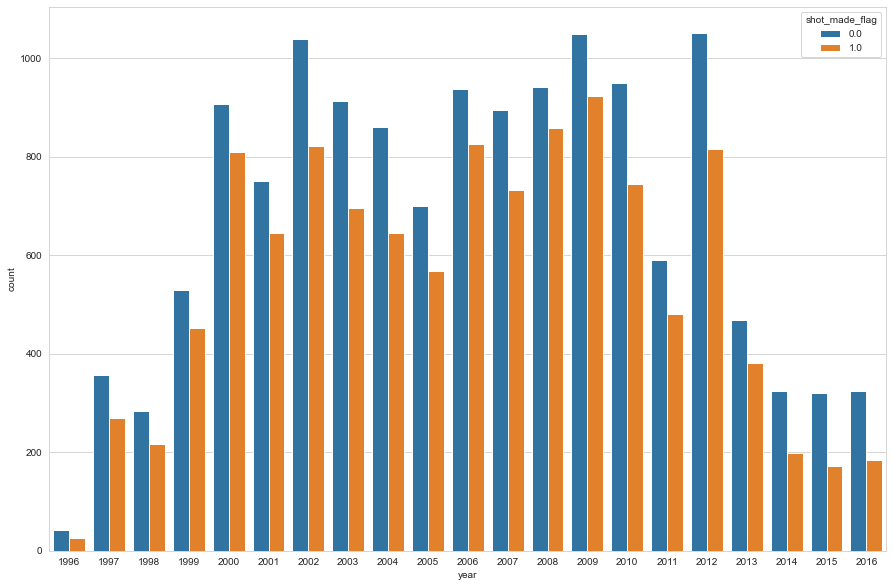

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x='year', hue='shot_made_flag', order=range(1996,2017), data=kobe)

### Total attempts/makes each season with shot percentages

In [10]:
count = pd.DataFrame(kobe.groupby('year').count()['shot_made_flag'])
count.rename(columns={'shot_made_flag':'total'}, inplace=True)
summ = pd.DataFrame(kobe.groupby('year').sum()['shot_made_flag'])
summ.rename(columns={'shot_made_flag':'shot_made'}, inplace=True)
prop_table = pd.concat([count,summ], axis=1)
prop_table['proportion'] = prop_table['shot_made']/prop_table['total']
prop_table['year'] = prop_table.index
prop_table

,total,shot_made,proportion,year
year,,,,
1996,69,26.0,0.376812,1996
1997,625,269.0,0.430400,1997
1998,499,216.0,0.432866,1998
1999,983,453.0,0.460834,1999
2000,1716,809.0,0.471445,2000
2001,1397,646.0,0.462419,2001
2002,1860,822.0,0.441935,2002
2003,1608,695.0,0.432214,2003
2004,1506,646.0,0.428951,2004


## Probability of shots by location on the court

### Kobe's effeciency each season (Shot percentage)

##### The chart below is a visual representation of table above

Text(0.5, 1.0, 'Shot Performance by Year')

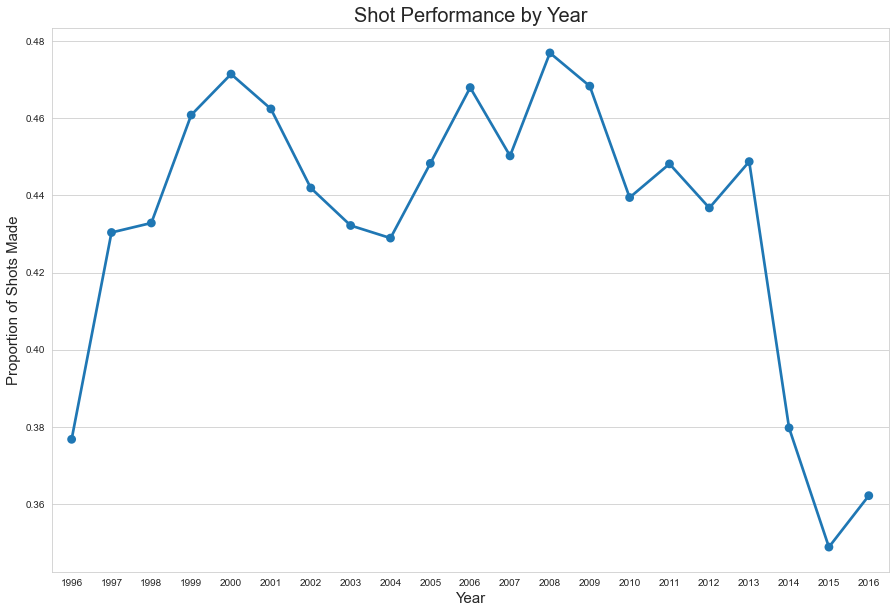

In [11]:
plt.figure(figsize=(15,10))
sns.pointplot(x='year', y='proportion', data=prop_table)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Proportion of Shots Made', fontsize=15)
plt.title('Shot Performance by Year', fontsize=20)

## Distance vs Shots Made

[Text(0.5, 0, 'Shot Distance'), Text(0, 0.5, '% Probability of shot made')]

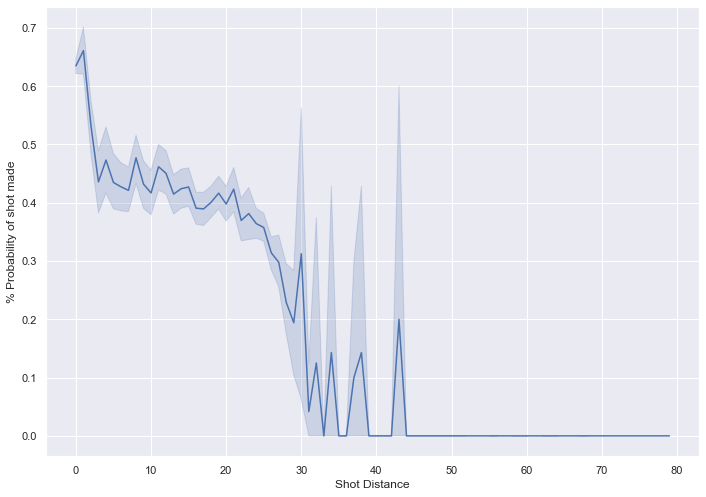

In [12]:
# Drop NaN values
labeled_data = kobe.dropna()
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.lineplot(data=labeled_data, x='shot_distance', y='shot_made_flag')
ax.set(xlabel='Shot Distance', ylabel='% Probability of shot made')

## Minutes Remaining vs Shots Made

[Text(0.5, 0, 'Minutes Remaining'), Text(0, 0.5, '% Probability of shot made')]

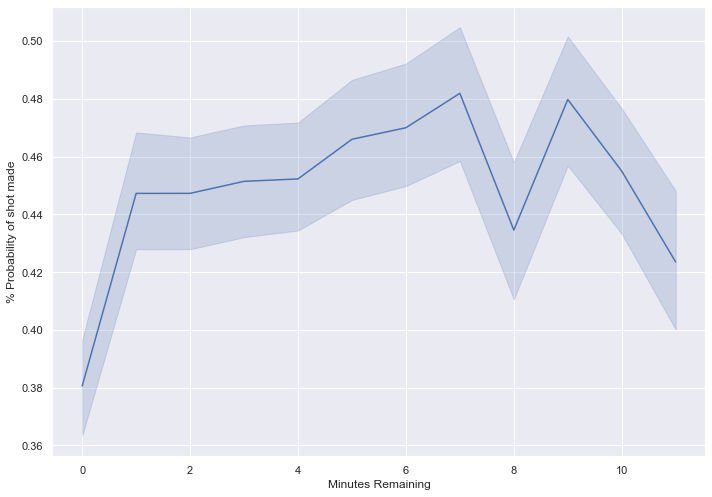

In [13]:
ax = sns.lineplot(data=labeled_data, x='minutes_remaining', y='shot_made_flag')
ax.set(xlabel='Minutes Remaining', ylabel='% Probability of shot made')

## Season vs Shots Made

[Text(0.5, 0, 'Season'), Text(0, 0.5, '% Probability of shot made')]

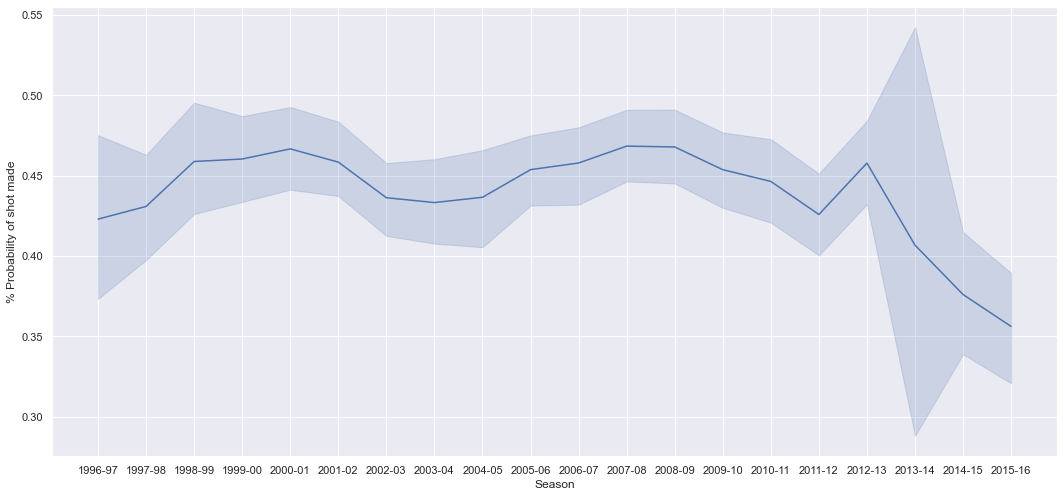

In [14]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.lineplot(data=labeled_data, x='season', y='shot_made_flag')
ax.set(xlabel='Season', ylabel='% Probability of shot made')